# Introduction to financial technical analysis

# 📌 Objectives

By the end of this notebook, students will be able to:

1. **Access and Manipulate Financial Data:**
   - Use the `yfinance` library to retrieve historical stock prices for all companies in the S&P 500 index.

2. **Compute Key Technical Indicators:**
   - Calculate 50-day and 200-day moving averages for each stock in the index.

3. **Detect Trading Signals:**
   - Identify Golden Crosses and Death Crosses as described in technical analysis literature.

4. **Analyze Recent Market Behavior:**
   - Isolate and examine stocks that experienced technical signals (crosses) in the last 14 days.

5. **Visualize Price Trends and Volatility:**
   - Plot historical price movements along with moving averages, and compute volatility around signal dates.

6. **Interpret Technical Indicators in Context:**
   - Reflect on what Golden and Death Crosses signify and how traders may respond to them.

7. **Evaluate Strategy Viability:**
   - Discuss the strengths and limitations of using moving averages as a standalone trading strategy.

8. **Connect Technical Analysis to Broader Market Intelligence:**
   - Explore how sentiment analysis and news (covered in later sections) could complement technical signals.

9. **Develop Critical Thinking About Signal Reliability:**
   - Assess potential risks of false positives and propose improvements or filters to enhance signal accuracy.

10. **Engage in Strategic Reflection:**
    - Answer analytical questions aimed at understanding the utility, risks, and presentation of the strategy to a professional audience.


## Import and install librairies

In [1]:
%pip install pandas
%pip install yfinance
%pip install lxml
%pip install matplotlib


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np



## Get the list of stocks in the S&P 500

In [3]:
# Read and print the stock tickers that make up S&P500
df_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(df_tickers.head())

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [4]:
display(df_tickers)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [8]:
ticker_list = df_tickers['Symbol'].tolist()

## Get the closing price of all 500 stocks in the S&P 500 Index


Use the yfinance library to retrieve the close price of all 500 stocks in the index between 2024-05-01 and 2025-05-01
https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

In [20]:
start_date = '2022-05-01'
end_date = '2025-05-01'

In [21]:
# CODE HERE
# Use as many coding cells as you need

# Load closing prices
# Make sure you end this coding section by displaying your results: display(df_close)


corrected_ticker_list = [ticker.replace('.', '-') for ticker in ticker_list]
if 'BF.B' in ticker_list and 'BF-B' not in corrected_ticker_list:
     corrected_ticker_list = [t if t != 'BF.B' else 'BF-B' for t in corrected_ticker_list]


# Ensure unique tickers just in case
corrected_ticker_list = list(set(corrected_ticker_list))

print("\nFull S&P 500 Tickers:")
display(df_tickers)


print(f"\nFetching closing prices for S&P 500 stocks between {start_date} and {end_date}...")
# Use the corrected_ticker_list for download
df_close = yf.download(corrected_ticker_list, start=start_date, end=end_date)['Close']





Full S&P 500 Tickers:


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


/tmp/ipython-input-21-1099230749.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_close = yf.download(corrected_ticker_list, start=start_date, end=end_date)['Close']
[                       0%                       ]


Fetching closing prices for S&P 500 stocks between 2022-05-01 and 2025-05-01...


[*********************100%***********************]  503 of 503 completed


In [22]:
# Remove columns that are all NaN (due to failed downloads or no data)
initial_columns = df_close.shape[1]
df_close = df_close.dropna(axis=1, how='all')
columns_after_drop = df_close.shape[1]
print(f"Removed {initial_columns - columns_after_drop} tickers with no data.")

# Also remove rows that are all NaN if any dates didn't have data for any stock
df_close = df_close.dropna(axis=0, how='all')

print("\nDataFrame of Closing Prices Head (after cleaning NaNs):")
display(df_close.head())
print("\nDataFrame of Closing Prices Tail (after cleaning NaNs):")
display(df_close.tail())

Removed 0 tickers with no data.

DataFrame of Closing Prices Head (after cleaning NaNs):


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-02,116.808105,155.237732,130.870438,152.779999,105.936386,43.627224,290.067596,407.290009,149.169907,81.363777,...,35.834309,70.005836,65.198952,77.172050,78.636612,105.860001,108.761559,117.387375,379.570007,169.064575
2022-05-03,119.572746,156.731506,132.401581,145.000000,105.560806,44.150219,290.277100,407.579987,149.849030,81.773758,...,36.836426,69.986320,64.714470,78.761742,79.155533,102.330002,108.113281,117.416557,368.140015,169.519516
2022-05-04,123.382660,163.158798,134.162811,156.179993,108.631042,44.987011,299.838043,423.350006,155.414047,83.040070,...,37.775894,70.249908,65.853905,81.896500,86.776062,106.790001,111.326508,122.904037,367.869995,171.184341
2022-05-05,119.328499,154.068253,134.684982,143.089996,106.105385,44.169239,284.449036,400.510010,149.254776,81.454887,...,36.371159,66.862358,65.306618,80.655098,82.912949,95.550003,108.630035,119.226273,347.750000,165.947891
2022-05-06,118.283234,154.796555,135.260269,135.839996,105.410591,44.254818,281.630280,391.010010,147.264572,81.746422,...,35.914841,64.724426,65.566818,81.887558,81.884697,96.190002,108.413940,117.076019,342.589996,163.779831



DataFrame of Closing Prices Tail (after cleaning NaNs):


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-24,106.795090,208.097107,178.825470,121.709999,128.801849,92.099998,291.410004,360.910004,194.345154,48.284031,...,25.294355,81.371361,69.709930,107.638626,115.241966,57.500000,146.859604,101.237473,244.080002,151.792435
2025-04-25,106.056648,209.005920,184.466751,122.510002,128.274216,90.680000,293.390015,367.720001,193.708054,47.759418,...,24.609919,81.900002,68.430580,107.579178,115.730400,58.090000,146.580978,101.247452,246.240005,152.958542
2025-04-28,106.645409,209.864792,190.692963,123.300003,128.951172,91.190002,293.250000,368.619995,192.841995,47.561451,...,25.363791,81.989769,69.005791,107.638626,115.550972,58.320000,147.028778,101.496803,243.490005,153.058212
2025-04-29,107.234169,210.933395,191.852951,125.489998,129.916840,92.389999,298.470001,370.980011,191.796753,47.294197,...,25.582018,81.341438,70.086792,107.371094,118.242386,59.560001,146.969070,102.524139,256.049988,154.912003
2025-04-30,107.373871,212.221710,193.429352,121.919998,130.165726,90.680000,299.149994,374.980011,194.036560,47.264503,...,25.701048,80.104607,70.116547,104.666008,120.186172,58.470001,149.705643,102.783463,250.320007,155.878769


## Identify Golden and Death Crosses

### Get Moving Averages 50 days and 200 days

In [23]:
# CODE HERE
# Use as many coding cells as you need

# Compute moving averages
# Make sure you end this coding section by displaying your results: display(df_ma50), display(df_ma200)
# Compute moving averages,


print("50-day Moving Averages Head (first non-NaN values):")
display(df_ma50.dropna().head())

print("200-day Moving Averages Head (first non-NaN values):")
display(df_ma200.dropna().head())



print("\nComputing 50-day Moving Averages...")
df_ma50 = df_close.rolling(window=50).mean()
print("50-day Moving Averages Head:")
display(df_ma50.head())
print("50-day Moving Averages Tail:")
display(df_ma50.tail())

print("\nComputing 200-day Moving Averages...")
df_ma200 = df_close.rolling(window=200).mean()
print("200-day Moving Averages Head:")
display(df_ma200.head())
print("200-day Moving Averages Tail:")
display(df_ma200.tail())

50-day Moving Averages Head (first non-NaN values):


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-12,136.302997,200.026287,157.946831,149.230201,101.705247,94.774535,294.136355,500.983600,220.845156,58.883522,...,28.635977,90.994023,52.200914,110.348561,137.153897,66.5818,132.703619,111.967999,312.594799,169.441455
2024-07-15,136.155669,201.326791,158.097099,149.051401,101.650909,94.800399,294.541235,502.910001,221.722054,58.989351,...,28.617367,90.837969,52.200766,110.350781,137.285973,66.6862,132.570661,111.715039,312.963799,169.825459
2024-07-16,136.131747,202.561505,158.287370,148.910001,101.599085,94.837294,295.053828,504.709400,222.658337,59.098795,...,28.596529,90.658511,52.213965,110.365015,137.397159,66.7216,132.462983,111.502260,313.424800,170.134554
2024-07-17,136.018783,203.472213,158.537831,148.675801,101.586111,94.903096,295.512039,506.247601,223.381334,59.233980,...,28.588928,90.430281,52.245242,110.414772,137.439619,66.7692,132.377596,111.297349,313.750800,170.429851
2024-07-18,135.852472,204.322559,158.728826,148.373401,101.487752,94.924016,295.973412,507.512800,224.098524,59.331824,...,28.578019,90.150694,52.283310,110.472570,137.423870,66.6586,132.236286,111.120927,313.902400,170.700040


200-day Moving Averages Head (first non-NaN values):


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2025-02-18,137.661171,222.553977,174.602081,135.917425,110.552056,96.886608,335.133551,501.402149,218.582089,55.158133,...,29.850141,87.269072,60.220799,111.751419,129.705496,74.07320,132.442906,108.265319,355.05165,175.279298
2025-02-19,137.657148,222.935305,174.797849,135.926525,110.688044,96.874578,335.607813,501.340149,218.830402,55.107647,...,29.848093,87.270659,60.303034,111.741800,129.709251,74.15845,132.516874,108.188568,355.13015,175.276146
2025-02-20,137.657127,223.302889,175.015309,135.911425,110.830991,96.867343,336.047054,501.230749,219.076690,55.055013,...,29.845925,87.265738,60.386451,111.739598,129.685572,74.22215,132.605334,108.118698,355.17150,175.233845
2025-02-21,137.640477,223.617635,175.224409,135.843225,110.982705,96.859121,336.367348,501.021449,219.283271,55.011354,...,29.842091,87.240239,60.470714,111.732055,129.643969,74.21655,132.689893,108.038981,355.17880,175.207431
2025-02-24,137.617634,223.948421,175.448402,135.757325,111.135838,96.845019,336.674356,500.775599,219.462271,54.963870,...,29.839634,87.207224,60.558582,111.723792,129.596992,74.17850,132.772837,107.970424,355.14760,175.210625



Computing 50-day Moving Averages...
50-day Moving Averages Head:


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


50-day Moving Averages Tail:


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-24,118.589775,219.229514,194.882049,128.497001,129.695852,91.7206,322.755805,401.392800,204.386194,46.354729,...,28.290147,82.616266,68.725403,109.007224,120.092335,60.865000,151.386326,105.303733,277.851799,158.931158
2025-04-25,117.960954,218.678437,194.779480,128.136801,129.675178,91.7690,320.885378,399.492000,204.194041,46.424616,...,28.199398,82.695181,68.768236,109.031401,119.825021,60.367001,151.415763,105.358225,275.718199,158.535975
2025-04-28,117.376370,218.051459,194.792595,127.782001,129.642279,91.7896,318.998219,397.680000,203.901112,46.480951,...,28.121558,82.734114,68.802902,109.041310,119.530667,59.847600,151.409784,105.399390,274.119598,158.320589
2025-04-29,116.839012,217.384534,194.840304,127.063401,129.652079,91.8734,317.245909,395.896400,203.482810,46.524306,...,28.049856,82.593967,68.855058,109.043688,119.324127,59.358801,151.419251,105.448960,272.873398,158.289488
2025-04-30,116.293892,216.745971,194.853134,126.289801,129.675380,91.9204,315.515956,394.113801,202.998097,46.560732,...,27.978171,82.381536,68.909186,108.954311,119.126358,58.844601,151.498900,105.470672,271.258199,158.298383



Computing 200-day Moving Averages...
200-day Moving Averages Head:


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


200-day Moving Averages Tail:


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-24,133.080365,227.101211,183.261853,130.701575,116.973859,96.197872,340.475852,478.509449,214.891999,52.358254,...,29.730782,85.165791,64.041626,111.437775,125.549300,72.28710,136.723924,106.728763,346.199799,172.881444
2025-04-25,132.988336,227.008163,183.380333,130.551875,117.119244,96.185332,340.478539,477.517949,214.720083,52.293548,...,29.719768,85.156248,64.130068,111.439661,125.467795,72.25500,136.835708,106.711042,345.854800,172.787551
2025-04-28,132.891063,226.898010,183.529515,130.409175,117.261134,96.177719,340.493397,476.538299,214.512770,52.222563,...,29.712475,85.151355,64.220807,111.437109,125.371803,72.22490,136.937422,106.688921,345.453200,172.697852
2025-04-29,132.778127,226.820123,183.676030,130.306625,117.402337,96.178483,340.515408,475.605049,214.322793,52.150145,...,29.699563,85.139760,64.309746,111.426794,125.281707,72.19025,137.037122,106.665544,345.091850,172.596477
2025-04-30,132.658894,226.733897,183.828656,130.182325,117.544590,96.173074,340.478451,474.684699,214.120323,52.077435,...,29.685689,85.115950,64.397867,111.402857,125.198612,72.13890,137.141726,106.640988,344.717500,172.493530


### Detecting Golden and Death Crosses in the last 14 days

In [24]:
# CODE HERE
# Use as many coding cells as you need

# define a function that detects golden and death crosses in the last 14 days for all stocks


# Define a function that detects golden and death crosses in the last 14 days for all stocks
def detect_crosses_last_n_days(df_close_prices, df_ma50, df_ma200, n_days=14):
    golden_crosses = []
    death_crosses = []

    # Iterate over each ticker
    for ticker in df_close_prices.columns:
        # Get data for the specific ticker
        close_series = df_close_prices[ticker]
        ma50_series = df_ma50[ticker]
        ma200_series = df_ma200[ticker]

        # Combine them into a temporary DataFrame for easier slicing
        temp_df = pd.DataFrame({
            'Close': close_series,
            'MA50': ma50_series,
            'MA200': ma200_series
        }).dropna() # Drop NaNs to ensure both MAs exist

        if len(temp_df) < max(50, 200): # Ensure enough data for MAs
            continue

        # Get data for the last 'n_days'
        last_n_days_data = temp_df.tail(n_days + 1) # +1 to check for a cross on the first day of the window

        if len(last_n_days_data) < 2: # Need at least two data points to detect a cross
            continue

        # Check for crosses within the last n_days
        for i in range(1, len(last_n_days_data)):
            current_date = last_n_days_data.index[i]
            previous_date = last_n_days_data.index[i-1]

            # Golden Cross condition: MA50 crosses above MA200
            # Previous day: MA50 < MA200 AND Current day: MA50 > MA200
            if (ma50_series.loc[previous_date] < ma200_series.loc[previous_date]) and \
               (ma50_series.loc[current_date] > ma200_series.loc[current_date]):
                golden_crosses.append({'Ticker': ticker, 'Date': current_date})

            # Death Cross condition: MA50 crosses below MA200
            # Previous day: MA50 > MA200 AND Current day: MA50 < MA200
            if (ma50_series.loc[previous_date] > ma200_series.loc[previous_date]) and \
               (ma50_series.loc[current_date] < ma200_series.loc[current_date]):
                death_crosses.append({'Ticker': ticker, 'Date': current_date})

    df_golden = pd.DataFrame(golden_crosses)
    df_death = pd.DataFrame(death_crosses)

    return df_golden, df_death

print(f"\nDetecting Golden and Death Crosses in the last 14 days...")
df_golden_cross_14d, df_death_cross_14d = detect_crosses_last_n_days(df_close, df_ma50, df_ma200, n_days=14)

print("\nGolden Crosses in Last 14 Days:")
display(df_golden_cross_14d)

print("\nDeath Crosses in Last 14 Days:")
display(df_death_cross_14d)


Detecting Golden and Death Crosses in the last 14 days...

Golden Crosses in Last 14 Days:


,Ticker,Date
0,AMT,2025-04-21
1,CI,2025-04-30
2,EW,2025-04-17
3,INVH,2025-04-30
4,KDP,2025-04-21
5,MDLZ,2025-04-28
6,MOH,2025-04-28
7,NEM,2025-04-14
8,SBAC,2025-04-29
9,SJM,2025-04-25



Death Crosses in Last 14 Days:


,Ticker,Date
0,ACN,2025-04-10
1,ADSK,2025-04-11
2,AME,2025-04-22
3,AMP,2025-04-24
4,AMZN,2025-04-22
...,...,...
57,UNP,2025-04-16
58,VST,2025-04-30
59,WAB,2025-04-21
60,WAT,2025-04-28


#### Golden crosses
List the first top companies in alphabetical order (by there symbol or ticker) that had a golden cross in the last 14 days:

In [25]:
print("\nTop Golden Cross Companies (Alphabetical by Ticker):")
if not df_golden_cross_14d.empty:
    top_golden_crosses = df_golden_cross_14d.sort_values(by='Ticker').head(10)
    print(top_golden_crosses)
else:
    print("No Golden Crosses detected in the last 14 days.")


Top Golden Cross Companies (Alphabetical by Ticker):
  Ticker       Date
0    AMT 2025-04-21
1     CI 2025-04-30
2     EW 2025-04-17
3   INVH 2025-04-30
4    KDP 2025-04-21
5   MDLZ 2025-04-28
6    MOH 2025-04-28
7    NEM 2025-04-14
8   SBAC 2025-04-29
9    SJM 2025-04-25


#### Death crosses
List the first 10 companies in alphabetical order (by there symbol or ticker) that had a death cross in the last 14 days:

In [26]:
print("\nTop Death Cross Companies (Alphabetical by Ticker):")
if not df_death_cross_14d.empty:
    top_death_crosses = df_death_cross_14d.sort_values(by='Ticker').head(10)
    print(top_death_crosses)
else:
    print("No Death Crosses detected in the last 14 days.")


Top Death Cross Companies (Alphabetical by Ticker):
  Ticker       Date
0    ACN 2025-04-10
1   ADSK 2025-04-11
2    AME 2025-04-22
3    AMP 2025-04-24
4   AMZN 2025-04-22
5    APD 2025-04-21
6    APO 2025-04-17
7    AXP 2025-04-22
8    BAC 2025-04-16
9    BLK 2025-04-16


### Visualization of the results
(in alphabetical order)

#### Compute the volatility of every stock and print it in the title of each plot

In [27]:
# CODE HERE
# Use as many coding cells as you need

# Compute the volatility of every stock in the S&P 500


print("\nComputing volatility for all S&P 500 stocks...")
# Volatility is usually calculated as the standard deviation of daily logarithmic returns
log_returns = np.log(df_close / df_close.shift(1))
volatility = log_returns.std() * np.sqrt(252) # Annualized volatility (252 trading days in a year)
print("Sample Volatility Data:")
print(volatility.head())


Computing volatility for all S&P 500 stocks...
Sample Volatility Data:
Ticker
A       0.298523
AAPL    0.292791
ABBV    0.230880
ABNB    0.459895
ABT     0.215473
dtype: float64


#### Plot top 10 stocks that had Golden Crosses in the last 14 days

- You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
- For each plot, put the volatility of the stock in the title of the plot


Plotting Top 10 Golden Cross Stocks:


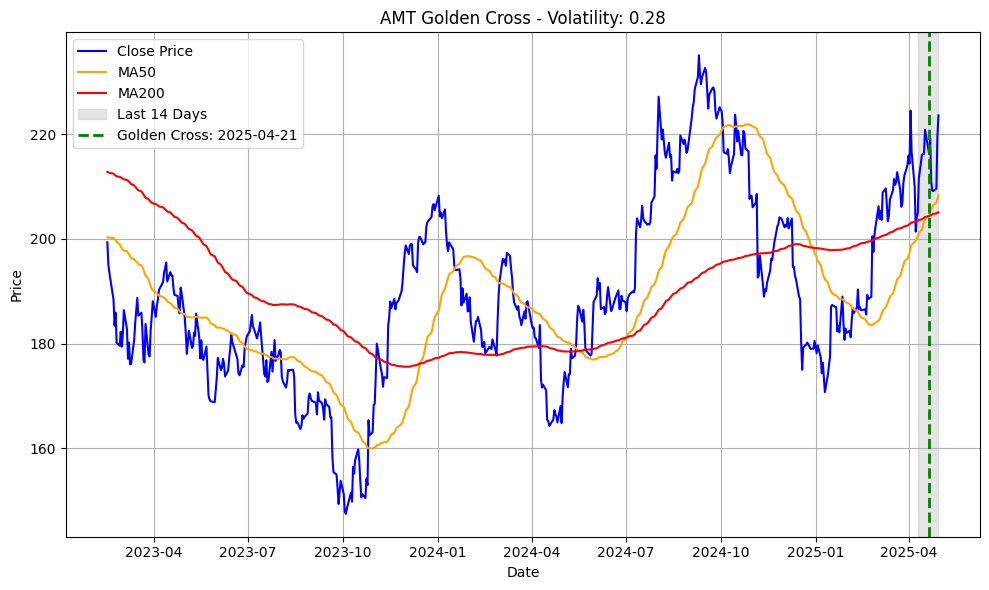

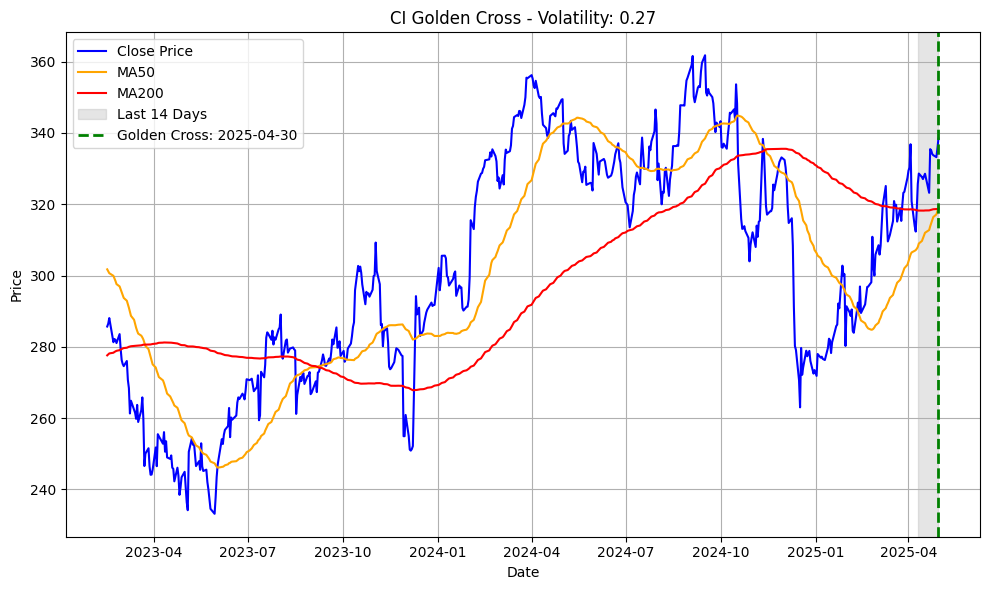

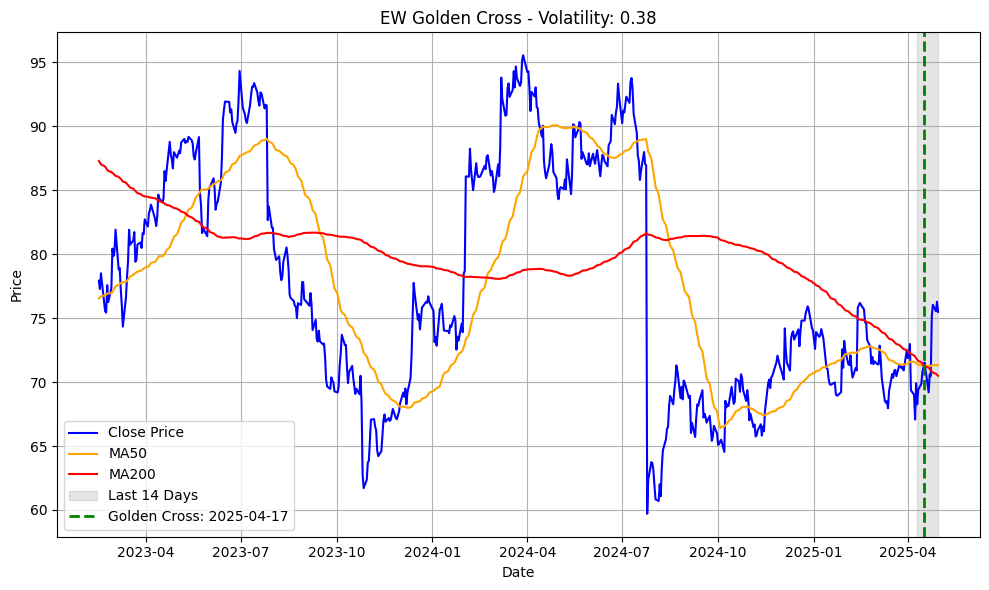

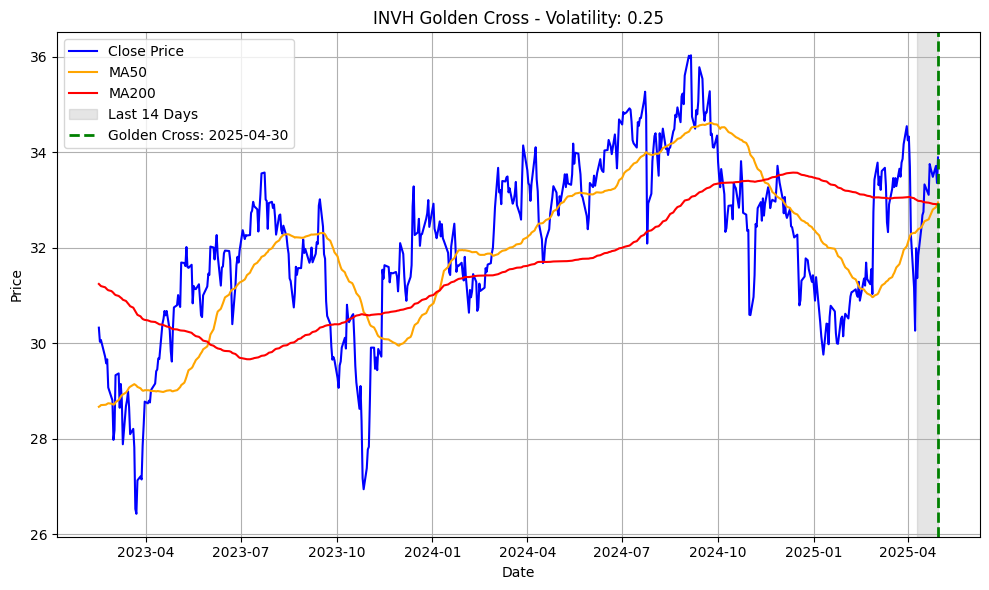

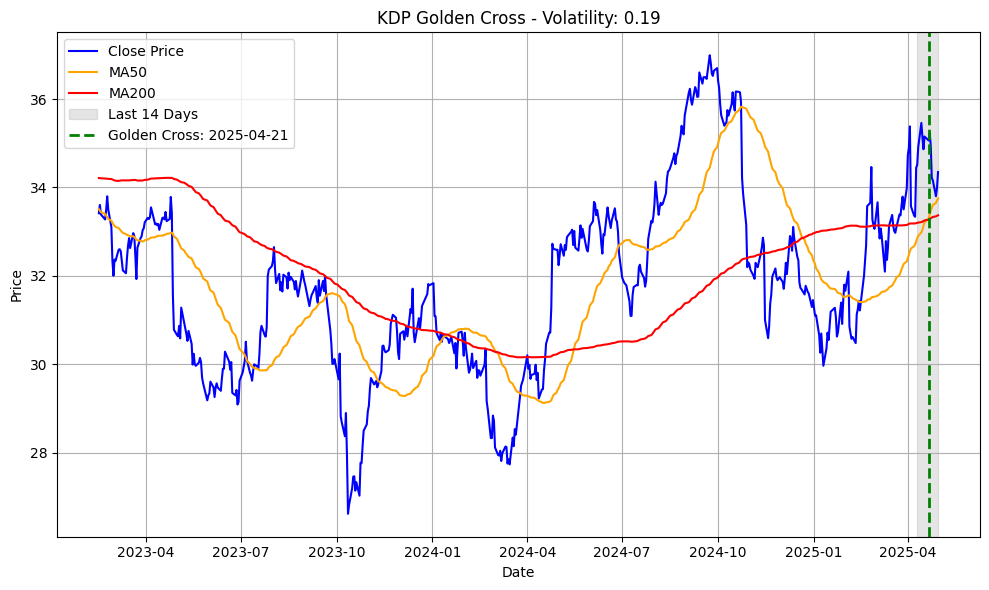

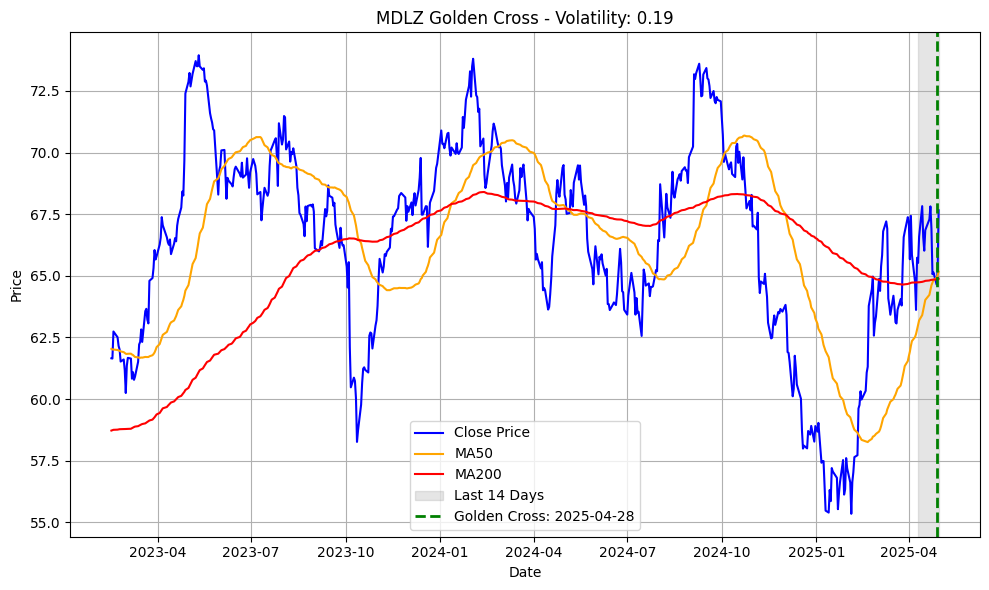

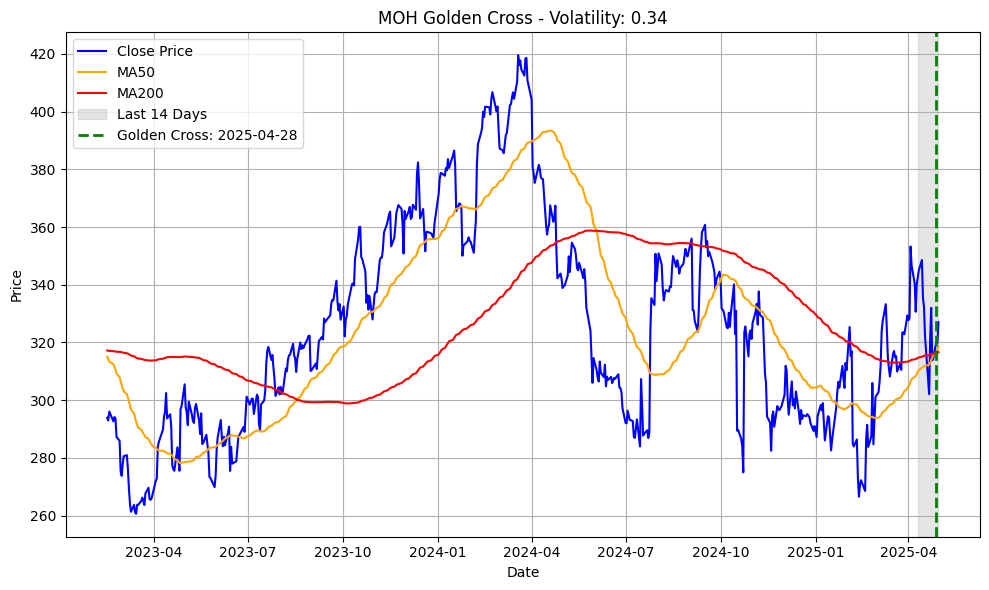

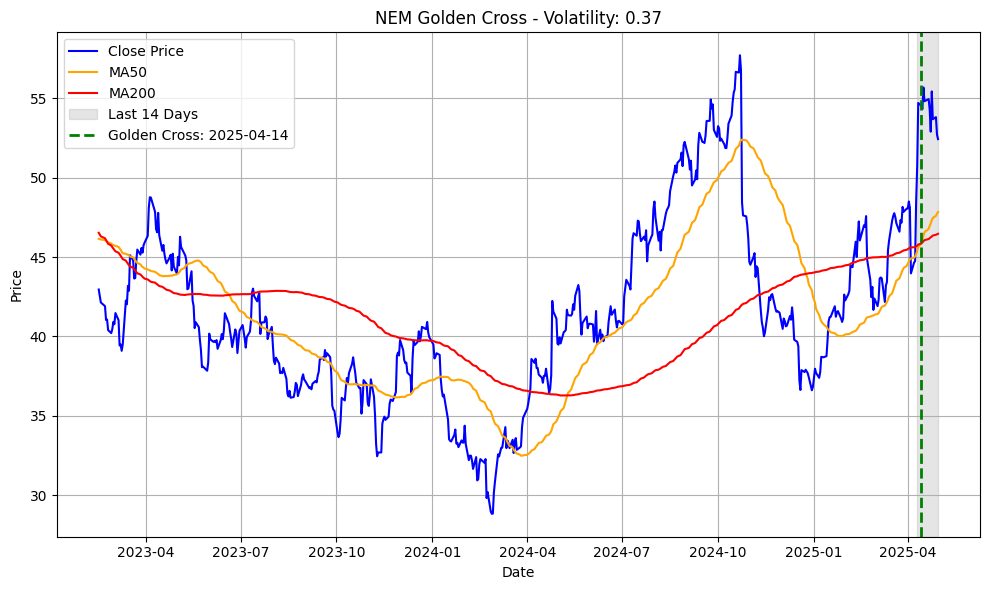

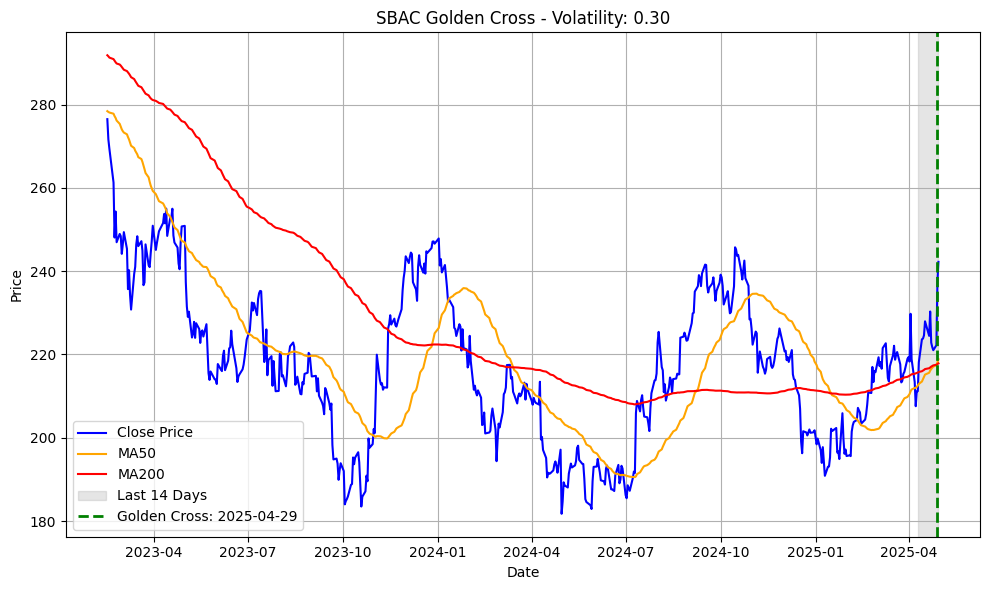

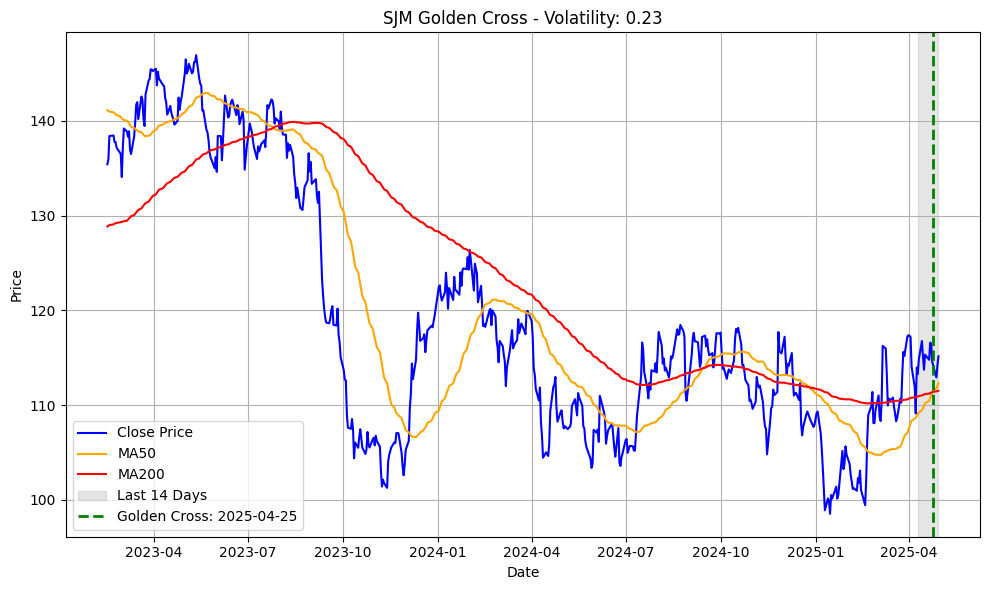

In [28]:
# CODE HERE
# Visualize the results here

print("\nPlotting Top 10 Golden Cross Stocks:")
if not df_golden_cross_14d.empty:
    golden_tickers_to_plot = df_golden_cross_14d['Ticker'].unique()
    golden_tickers_to_plot = sorted(golden_tickers_to_plot)[:10] # Get first 10 in alphabetical order

    for ticker in golden_tickers_to_plot:
        fig, ax = plt.subplots(figsize=(10, 6))

        # Get data for the specific ticker
        ticker_data = df_close[ticker].dropna()
        ticker_ma50 = df_ma50[ticker].dropna()
        ticker_ma200 = df_ma200[ticker].dropna()

        # Ensure enough data points to plot the full range after MAs are calculated
        # Find the common start index where both MAs begin
        start_plot_index = max(ticker_ma50.first_valid_index(), ticker_ma200.first_valid_index())
        if start_plot_index is None: # If no valid MAs
            print(f"Not enough valid MA data to plot for {ticker}. Skipping.")
            plt.close(fig) # Close the empty figure
            continue

        # Slice all series from the common start index
        ticker_data_plot = ticker_data.loc[start_plot_index:]
        ticker_ma50_plot = ticker_ma50.loc[start_plot_index:]
        ticker_ma200_plot = ticker_ma200.loc[start_plot_index:]


        # Plot Close Price
        ax.plot(ticker_data_plot.index, ticker_data_plot, label='Close Price', color='blue')
        # Plot MA50
        ax.plot(ticker_ma50_plot.index, ticker_ma50_plot, label='MA50', color='orange')
        # Plot MA200
        ax.plot(ticker_ma200_plot.index, ticker_ma200_plot, label='MA200', color='red')

        # Highlight the last 14 days
        last_14_days_dates = ticker_data_plot.index[-14:]
        if not last_14_days_dates.empty:
            ax.axvspan(last_14_days_dates[0], last_14_days_dates[-1], color='grey', alpha=0.2, label='Last 14 Days')

        # Get the date of the Golden Cross if it occurred in the last 14 days
        cross_info = df_golden_cross_14d[(df_golden_cross_14d['Ticker'] == ticker)]
        if not cross_info.empty:
            # We only care about the most recent cross if there are multiple in 14 days for plotting
            cross_date = cross_info['Date'].max() # Take the latest cross date
            ax.axvline(cross_date, color='green', linestyle='--', linewidth=2, label=f'Golden Cross: {cross_date.strftime("%Y-%m-%d")}')

        # Get volatility for the current ticker
        ticker_volatility = volatility.get(ticker, np.nan) # Use .get() to handle potential missing tickers
        title_volatility = f"Volatility: {ticker_volatility:.2f}" if not np.isnan(ticker_volatility) else "Volatility: N/A"

        ax.set_title(f"{ticker} Golden Cross - {title_volatility}")
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.legend()
        ax.grid(True)
        plt.tight_layout()
        plt.show()
else:
    print("No Golden Crosses to plot.")

### Plot top 10 stocks that had Death Crosses in the last 14 days

You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
For each plot, put the volatility of the stock in the title of the plot


Plotting Top 10 Death Cross Stocks:


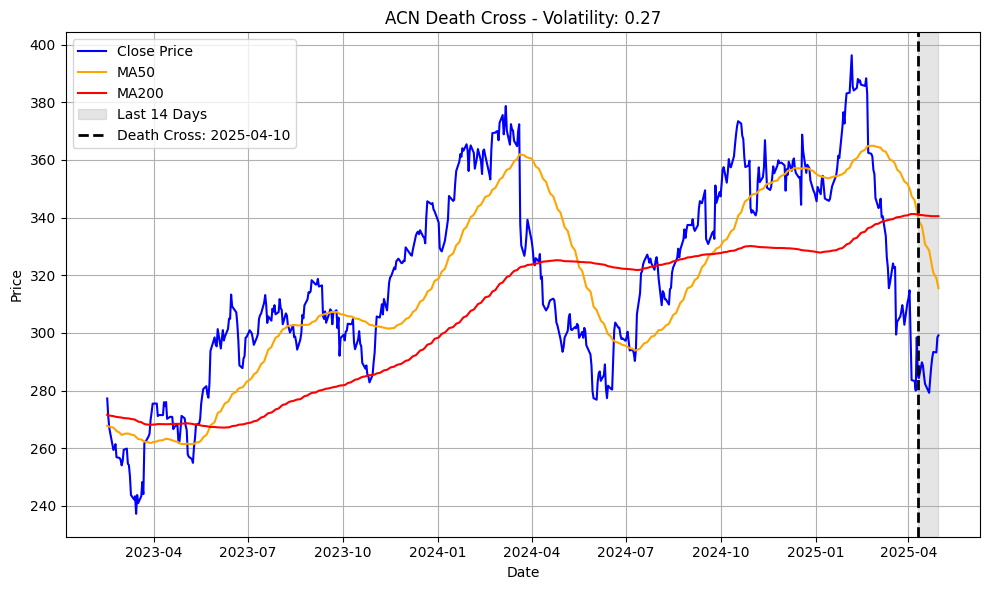

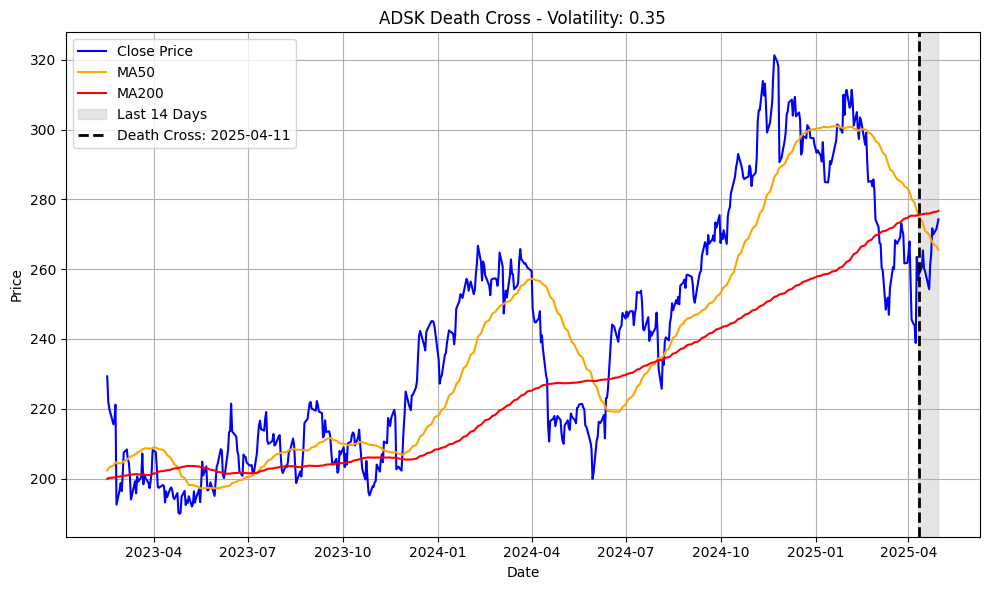

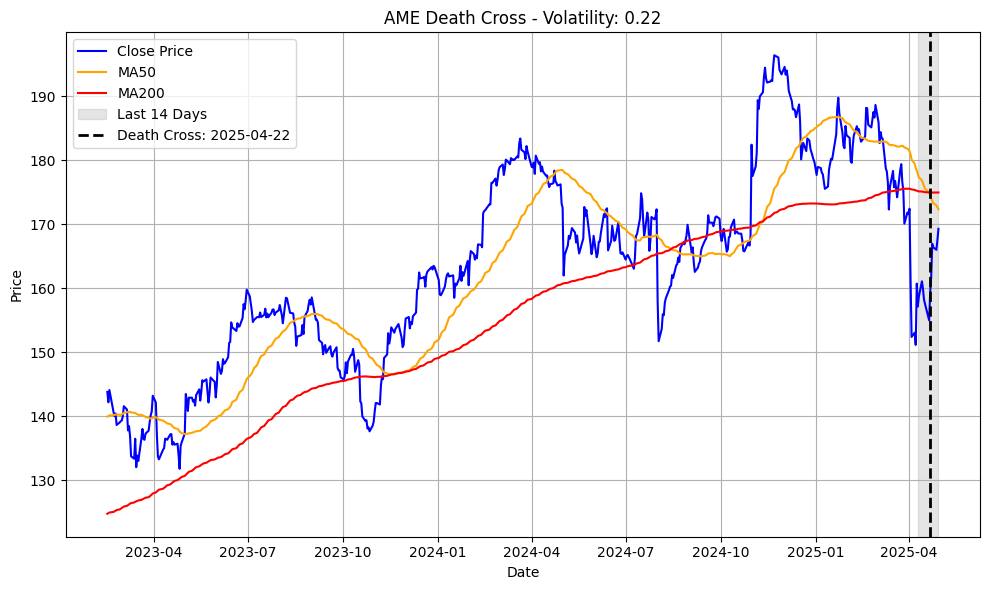

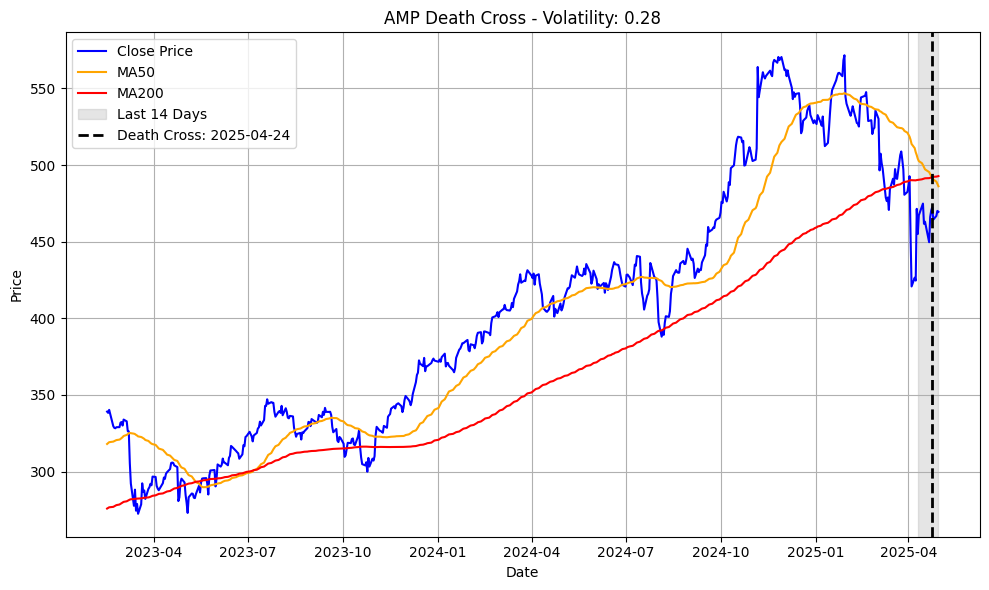

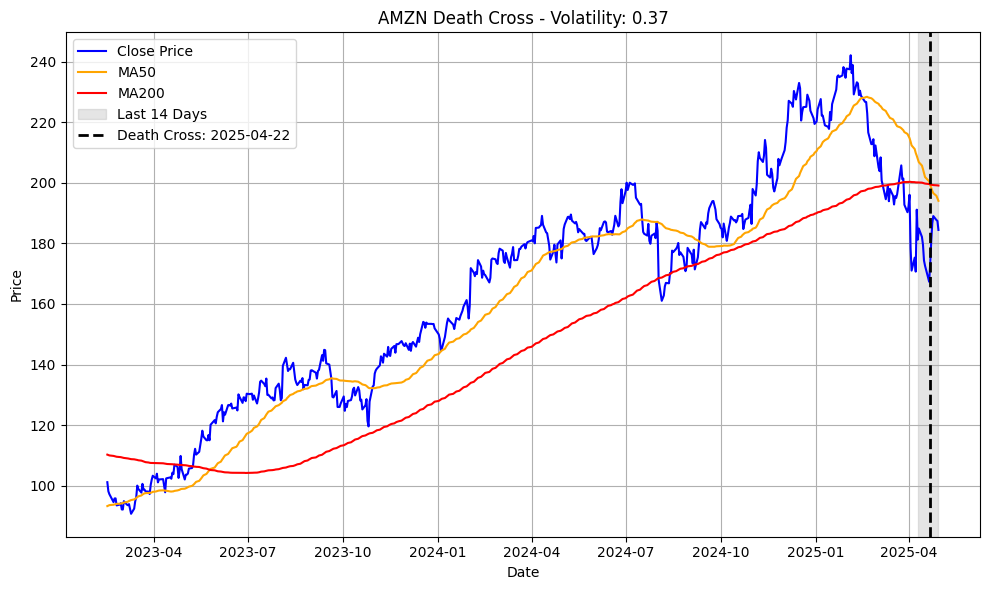

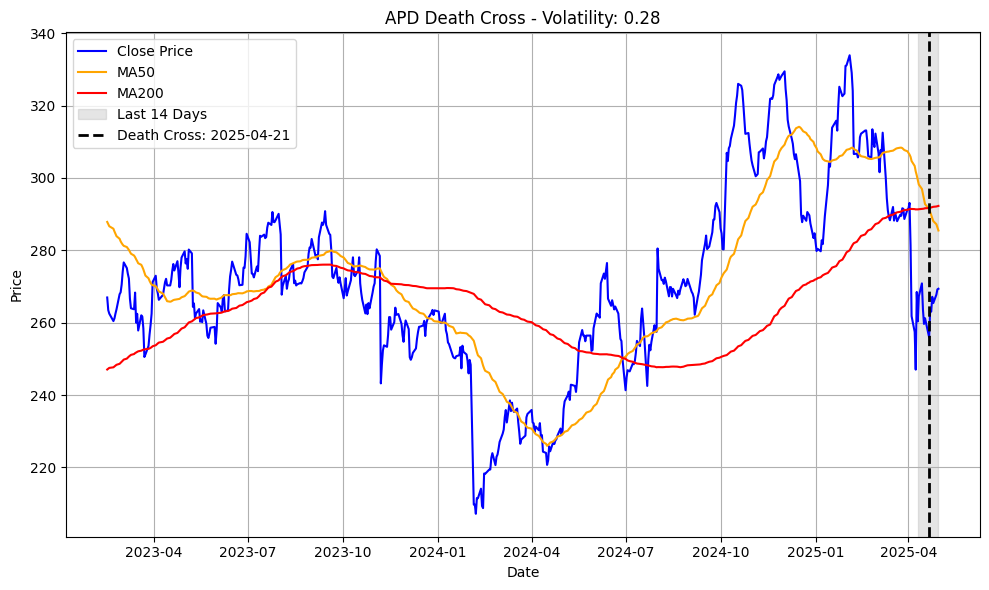

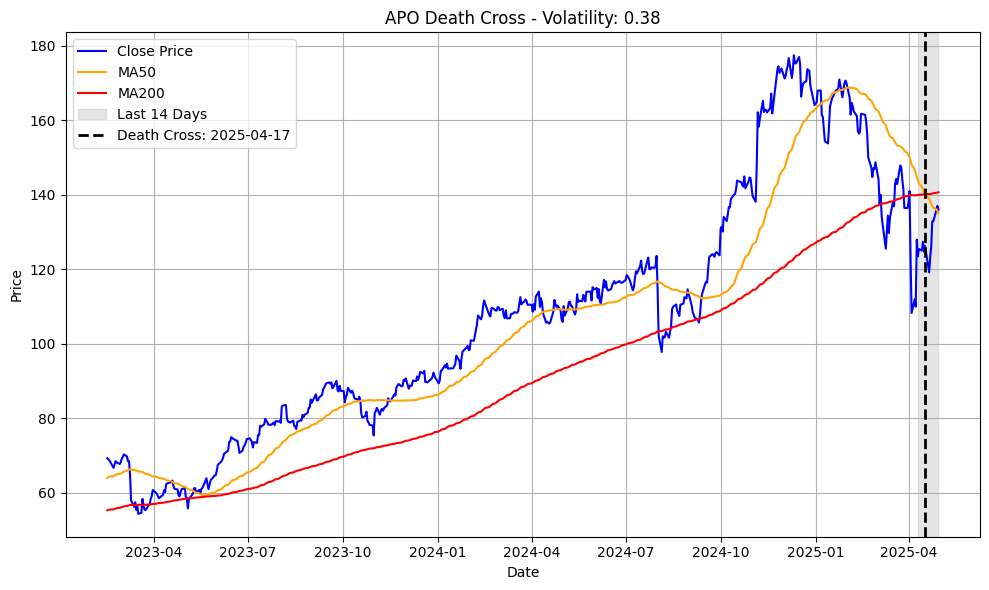

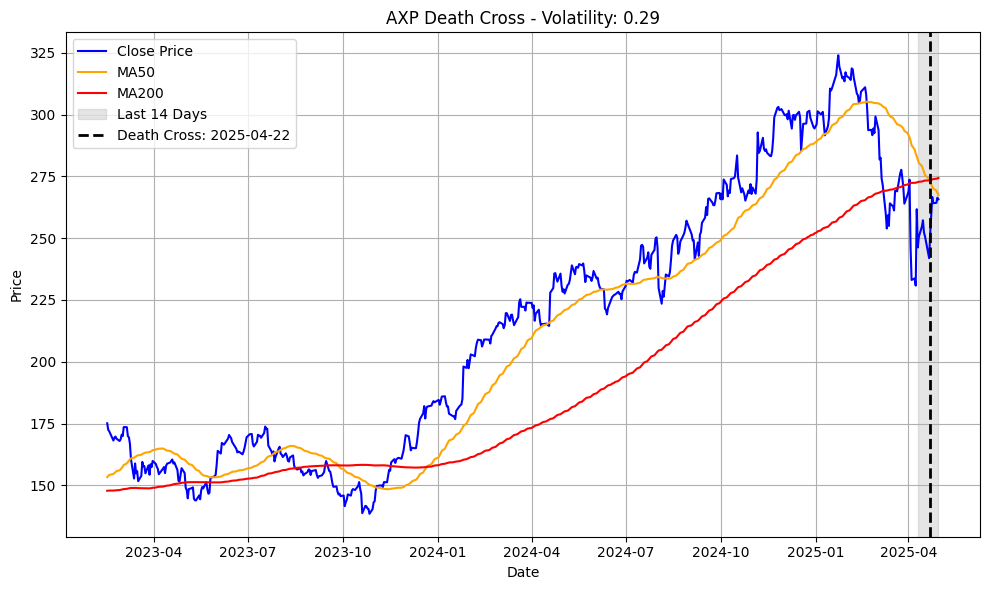

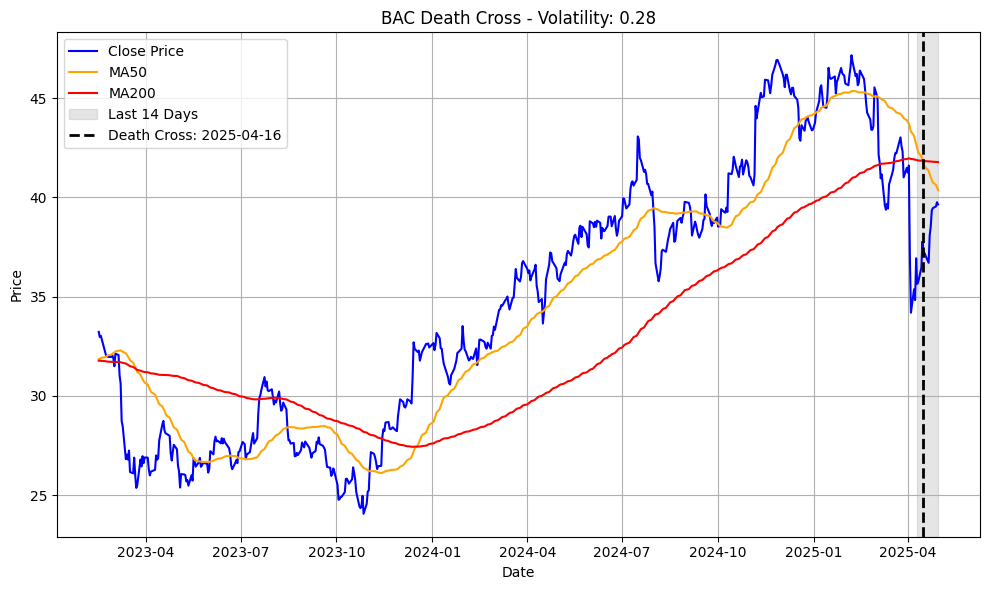

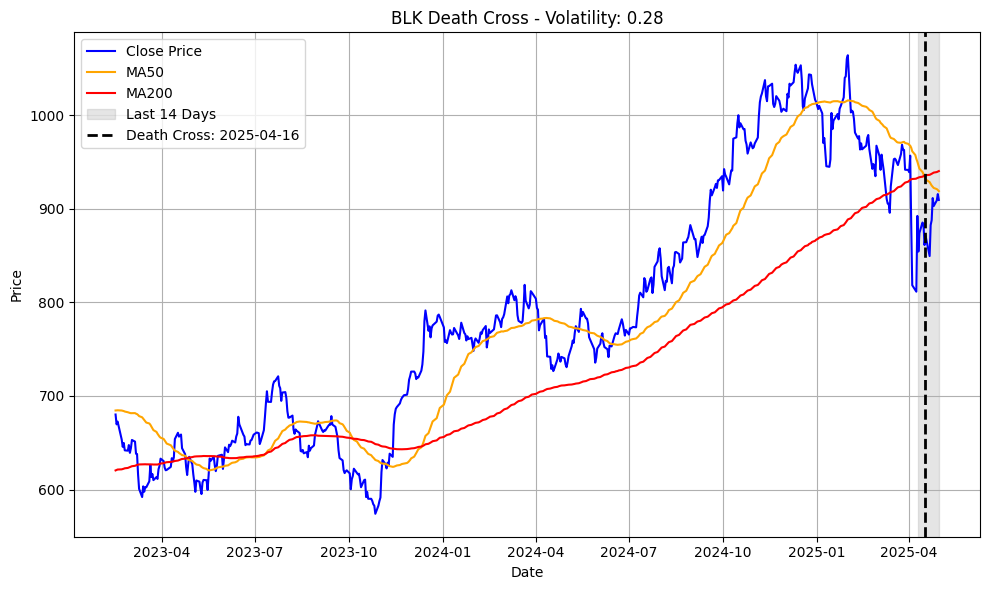

In [29]:
# CODE HERE
# Visualize the results here


print("\nPlotting Top 10 Death Cross Stocks:")
if not df_death_cross_14d.empty:
    death_tickers_to_plot = df_death_cross_14d['Ticker'].unique()
    death_tickers_to_plot = sorted(death_tickers_to_plot)[:10] # Get first 10 in alphabetical order

    for ticker in death_tickers_to_plot:
        fig, ax = plt.subplots(figsize=(10, 6))

        # Get data for the specific ticker
        ticker_data = df_close[ticker].dropna()
        ticker_ma50 = df_ma50[ticker].dropna()
        ticker_ma200 = df_ma200[ticker].dropna()

        # Ensure enough data points to plot the full range after MAs are calculated
        start_plot_index = max(ticker_ma50.first_valid_index(), ticker_ma200.first_valid_index())
        if start_plot_index is None: # If no valid MAs
            print(f"Not enough valid MA data to plot for {ticker}. Skipping.")
            plt.close(fig) # Close the empty figure
            continue

        # Slice all series from the common start index
        ticker_data_plot = ticker_data.loc[start_plot_index:]
        ticker_ma50_plot = ticker_ma50.loc[start_plot_index:]
        ticker_ma200_plot = ticker_ma200.loc[start_plot_index:]


        # Plot Close Price
        ax.plot(ticker_data_plot.index, ticker_data_plot, label='Close Price', color='blue')
        # Plot MA50
        ax.plot(ticker_ma50_plot.index, ticker_ma50_plot, label='MA50', color='orange')
        # Plot MA200
        ax.plot(ticker_ma200_plot.index, ticker_ma200_plot, label='MA200', color='red')

        # Highlight the last 14 days
        last_14_days_dates = ticker_data_plot.index[-14:]
        if not last_14_days_dates.empty:
            ax.axvspan(last_14_days_dates[0], last_14_days_dates[-1], color='grey', alpha=0.2, label='Last 14 Days')

        # Get the date of the Death Cross if it occurred in the last 14 days
        cross_info = df_death_cross_14d[(df_death_cross_14d['Ticker'] == ticker)]
        if not cross_info.empty:
            cross_date = cross_info['Date'].max() # Take the latest cross date
            ax.axvline(cross_date, color='black', linestyle='--', linewidth=2, label=f'Death Cross: {cross_date.strftime("%Y-%m-%d")}')

        # Get volatility for the current ticker
        ticker_volatility = volatility.get(ticker, np.nan)
        title_volatility = f"Volatility: {ticker_volatility:.2f}" if not np.isnan(ticker_volatility) else "Volatility: N/A"

        ax.set_title(f"{ticker} Death Cross - {title_volatility}")
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.legend()
        ax.grid(True)
        plt.tight_layout()
        plt.show()
else:
    print("No Death Crosses to plot.")

## Question section

### Understanding concepts

#### What is a Golden Cross and what does it typically signal to investors?

A Golden Cross is a bullish technical indicator that occurs when a short-term moving average (commonly the 50-day MA) crosses above a long-term moving average (commonly the 200-day MA). It typically signals to investors that a significant upward trend in the stock price is likely to begin or accelerate, suggesting strong positive momentum and potentially a good entry point for buying.



#### What is a Death Cross and how might market participants react to it?

A Death Cross is a bearish technical indicator that occurs when a short-term moving average (commonly the 50-day MA) crosses below a long-term moving average (commonly the 200-day MA). Market participants typically react to it by interpreting it as a signal of a significant downward trend or a bear market beginning or strengthening. This can lead to increased selling pressure, reduced buying interest, and a general bearish sentiment, potentially prompting investors to sell holdings or consider short positions.



#### Why might moving averages (MA50, MA200) be used as indicators in technical analysis?

Moving averages (MA50, MA200) are used as indicators in technical analysis because they smooth out price data over a specified period, helping to identify trends and reduce "noise" from random price fluctuations. The 50-day MA is considered a short-to-medium-term trend indicator, reflecting recent price momentum, while the 200-day MA represents the long-term trend, indicating the overall health and direction of the stock. Their crossover points (Golden and Death Crosses) are believed to signify shifts in the underlying trend, providing simplified visual cues for potential trend reversals or continuations.



#### Why are the last 14 days used to check for crosses? What are the implications of this choice?

The choice of using the last 14 days to check for crosses implies a focus on very recent and short-term trend shifts. The implications of this choice are that the signals detected will be highly timely and reflect the most current market momentum. However, this also means the signals might be more prone to "false positives" or whipsaws, where a cross occurs but quickly reverses, as short-term price movements are more volatile and less indicative of a sustained trend change compared to crosses confirmed over longer periods. It emphasizes reactivity over long-term trend confirmation.



#### How does volatility (e.g., measured using percentage change standard deviation) help contextualize the price movement around crosses?

Volatility, measured using percentage change standard deviation, helps contextualize price movement around crosses by indicating the degree of price fluctuation or risk associated with the stock. A high volatility around a cross suggests that price movements are rapid and potentially unpredictable, implying higher risk but also potentially higher reward. Conversely, low volatility suggests more stable and predictable price movements. This context is crucial because a Golden Cross in a highly volatile stock might lead to sharp upward movements but also carries the risk of equally sharp reversals, whereas in a low-volatility stock, the upward movement might be slower but potentially more sustained. It informs the investor about the expected "bumpiness" of the ride.



### Backtesting and evaluation

#### How would you measure whether Golden Crosses actually lead to profitable trades?

To measure whether Golden Crosses lead to profitable trades, I would implement a backtesting strategy:
1. Define a Trading Strategy: For every Golden Cross event: initiate a "buy" signal. Define an "exit" signal, such as a Death Cross, a fixed profit target (e.g., 5% gain), a fixed stop-loss (e.g., 3% loss), or a specific time horizon (e.g., hold for 60 days).
2. Calculate Returns: For each trade, calculate the percentage return from the entry point (Golden Cross date) to the exit point.
3. Benchmark: Compare these returns against a benchmark (e.g., the S&P 500 index returns over the same periods, or a simple buy-and-hold strategy for the same stock) to determine if the strategy generated alpha.
4. Performance Metrics: Compute key metrics:
    * Average Return per Trade: The mean profit/loss from all trades.
    * Win Rate: Percentage of profitable trades.
    * Total Return: Cumulative return of all trades.
    * Maximum Drawdown: The largest peak-to-trough decline.
    * Sharpe Ratio/Sortino Ratio: Risk-adjusted returns.
    * Number of Trades: To assess feasibility and frequency of signals.
5. Statistical Significance: Perform statistical tests (e.g., t-test) to determine if the strategy's average returns are significantly different from zero or from the benchmark.


#### What are the risks of using only technical indicators like moving averages without incorporating fundamentals?

Using only technical indicators like moving averages without incorporating fundamentals carries significant risks:
1. Lack of Context: Technical indicators provide no insight into a company's underlying health, business model, competitive landscape, management quality, or earnings prospects. A stock might look good technically but have severe fundamental problems.
2. False Signals: Technical indicators can generate numerous false buy or sell signals (whipsaws) that do not translate into sustained price movements, especially in volatile or sideways markets.
3. Lagging Nature: Moving averages are lagging indicators, meaning they are based on past price data. They confirm trends rather than predict them, potentially leading to delayed entry or exit points where much of the move has already occurred.
4. Ignoring Material Events: Fundamental analysis considers news, economic reports, and corporate actions (e.g., bankruptcies, mergers, product recalls) that can drastically impact a stock's value, which technical indicators alone cannot predict or explain.
5. Market Mania/Panic: Technical patterns can be amplified by market sentiment, leading to bubbles or crashes that defy fundamental valuation. Relying solely on technicals might cause one to ride these waves without understanding the underlying risks.

#### How would you improve this strategy to reduce false signals (e.g., a Golden Cross that doesn’t lead to a price increase)?

To improve this strategy and reduce false signals:
1. Confirm with Other Indicators: Combine the Golden Cross with other technical indicators. For example, look for confirmation from volume (a Golden Cross on high volume is stronger), RSI (to avoid overbought conditions), MACD (momentum confirmation), or candlestick patterns.
2. Volume Confirmation: Require a significant increase in trading volume coinciding with or immediately following the cross, indicating stronger conviction behind the price move.
3. Filter by Market Conditions: Avoid acting on crosses in sideways or highly volatile, choppy markets where moving averages tend to whipsaw. Only consider signals in established trends.
4. Multi-Timeframe Analysis: Validate the cross on a longer timeframe (e.g., a Golden Cross on a daily chart combined with an upward trend on a weekly chart).
5. Incorporate Fundamentals: Filter signals based on fundamental strength. Only consider Golden Crosses for companies with strong earnings growth, healthy balance sheets, or positive industry outlooks.
6. Sentiment Analysis (as per next section): Use positive news sentiment to validate bullish crosses and negative sentiment to invalidate bullish crosses or confirm bearish ones.


### AI Integration


#### Could sentiment from news (future project part) help validate or invalidate these technical signals?

Absolutely, sentiment from news could significantly help validate or invalidate these technical signals. A Golden Cross appearing with overwhelmingly positive news sentiment (e.g., high volume of positive articles, low negative sentiment) about the company's prospects, earnings, or industry innovation would strongly validate the bullish signal, suggesting a higher probability of sustained upward movement. Conversely, a Golden Cross accompanied by neutral or even negative news sentiment (e.g., concerning regulatory issues, competitive pressures, or internal problems) would largely invalidate the technical signal, suggesting it might be a false breakout or a result of technical noise rather than fundamental strength. Similarly, for a Death Cross, highly negative sentiment would confirm the bearish outlook, while surprisingly positive sentiment might suggest the technical signal is misleading or an overreaction. This integration combines quantitative price action with qualitative market perception for a more robust trading strategy.


### Critical thinking

#### From a trading perspective, is this strategy actionable on its own?

From a trading perspective, this strategy is not actionable on its own as a primary, standalone method for consistent profitability. While Golden and Death Crosses are widely recognized and can sometimes precede significant moves, relying solely on them without additional layers of analysis would lead to numerous false signals, whipsaws, and potentially substantial losses. They are lagging indicators, meaning they confirm trends after they've already started, often leading to sub-optimal entry and exit points. A purely technical strategy based on just two moving averages lacks the necessary context from fundamental analysis, volume, market sentiment, or broader economic conditions to be robustly profitable in diverse market environments.


#### Based on the volatility observed post-Golden Cross, do these crosses consistently predict upward movement?

Based on the volatility observed post-Golden Cross (which would be visible in the plots if a cross occurred near the end of the period), these crosses do not consistently predict upward movement on their own. Volatility measures the degree of price fluctuation, not necessarily the direction or sustainability of a trend. A Golden Cross occurring in a highly volatile stock implies that while an upward move could be sharp, it's also prone to quick reversals and large price swings, which makes predicting consistent upward movement difficult. High volatility can mean more noise and less reliable trend signals. Even if an upward movement begins, its consistency and sustainability are not guaranteed by the cross itself, especially in a volatile environment where prices can swing wildly in both directions.



#### If you had to present this analysis to a portfolio manager, what conclusions would you emphasize? What caveats would you include?

Conclusions in 2 bullet points:

* Trend Confirmation: Emphasize that Golden and Death Crosses are valuable tools for confirming shifts in underlying long-term and short-term trends, providing a clear visual representation of momentum changes in a stock.
* Initial Signal Generation: Highlight their utility as a first-pass filter or an initial signal generator to identify stocks potentially undergoing significant trend reversals, meriting further, deeper analysis.


Caveats in 2 or 3 bullet points:

* Lagging Indicator: Crucially, state that these are lagging indicators and do not predict future movements, often confirming a trend after a significant portion of the move has already occurred, potentially leading to sub-optimal entry/exit points.
* False Signals/Whipsaws: Warn that these crosses frequently produce false signals or "whipsaws," especially in sideways or highly volatile markets, leading to unprofitable trades if used in isolation.
* Context Dependency: Stress that they must be used in conjunction with other analyses (e.g., fundamental analysis, volume, broader market sentiment, other technical indicators) as they lack the fundamental context necessary for robust decision-making on their own. They are a piece of the puzzle, not the whole picture.